In [1]:
# Import libraries
import os
import numpy as np
import nmrformd as nmrmd
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
from scipy.special import sph_harm

In [2]:
# For figure plotting
import sys
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
msize = 5
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue_light = [42/ 255, 99/255, 255/ 255] # [0/ 255, 150/255, 177/ 255]
myblue_dark = [43/ 255, 140/255, 238/ 255] # [0/ 255, 150/255, 177/ 255]
myred= [244/ 255, 143/255, 97/ 255] # [255/ 255, 77/255, 77/ 255]
mygreen = [122/255, 190/255, 165/255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
white = [0, 0, 0]
black = [1, 1, 1]
sys.path.append('../../shared/')
from tools import figure_improvement, save_figure

# Path to data
datapath = "../../raw-data/HEWL-in-water/"

alpha_m = [np.sqrt(16 * np.pi / 5), np.sqrt(8 * np.pi / 15), np.sqrt(32 * np.pi / 15)]

# Compare mass with experiments

10.1016/S0006-3495(86)83722-5

In [22]:
desired_mass_ratio = 0.22
mass_single_D2O_molecule = 16 + 2*2 # g/mol
mass_protein = 26820.017 # g/mol
N_water =  desired_mass_ratio* mass_protein / (1 - desired_mass_ratio) / mass_single_D2O_molecule
print(np.int32(N_water), "molecule necessary")

378 molecule necessary


In [23]:
for T in [320]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf.gro")
    mass_oxy_water = np.sum(u.select_atoms("name OW").atoms.masses)
    mass_hyf_water = np.sum(u.select_atoms("name HW1 HW2").atoms.masses)*2 # assume is deuterated
    mass_water = mass_oxy_water+mass_hyf_water

    for name in np.unique(u.atoms.names):
        all_name = ' '
        for name in np.unique(u.atoms.names):
            if (name != 'OH') & (name != 'HW2') & (name != 'HW1'):
                all_name += name + ' '
        protein = u.select_atoms('name '+all_name)
        mass_protein = np.sum(protein.atoms.masses)

    print("g(D20) / g(HEWL + D20) =", np.round(mass_water / (mass_protein + mass_water),2), " -- exp = 0.22")

g(D20) / g(HEWL + D20) = 0.36  -- exp = 0.22


In [24]:
mass_protein

26820.017

In [7]:
datapath+"T"+str(T)+"K/conf.gro"

'../../raw-data/HEWL-in-water/T320K/conf.gro'

/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


0.0 0.0


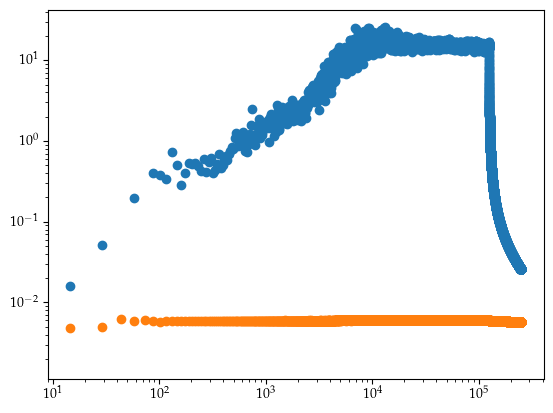

/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


0.0 0.0


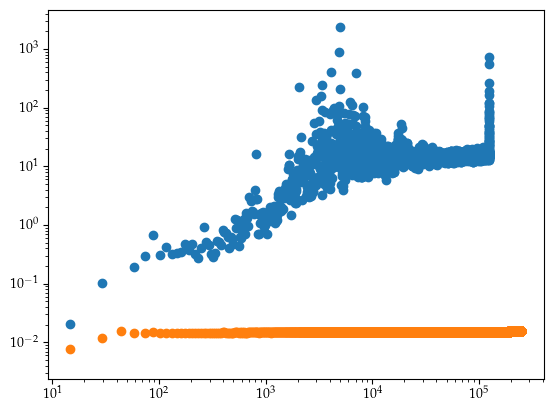

In [6]:
for T in [240, 260, 280, 300, 320]:
    if os.path.exists(datapath+"T"+str(T)+"K/prod.xtc"):
        u = mda.Universe(datapath+"T"+str(T)+"K/conf_dry.gro", datapath+"T"+str(T)+"K/prod.xtc")
        all_name = ' '
        for name in np.unique(u.atoms.names):
            if (name[0] == 'H') & (name != 'HW2') & (name != 'HW1'):
                all_name += name + ' '
        hydrogen_protein = u.select_atoms('name '+all_name)

        nmr_result = nmrmd.NMR(u, hydrogen_protein, number_i=20)

        print(np.round(nmr_result.T1, 2), np.round(nmr_result.T2, 2))

        plt.loglog(nmr_result.f, 1/nmr_result.R1, 'o')
        plt.loglog(nmr_result.f, 1/nmr_result.R2, 'o')

        plt.show()

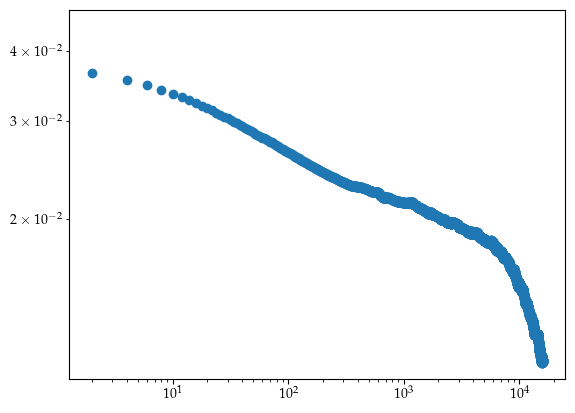

In [7]:
plt.loglog(nmr_result.t[:8000], nmr_result.gij[0][:8000], 'o')

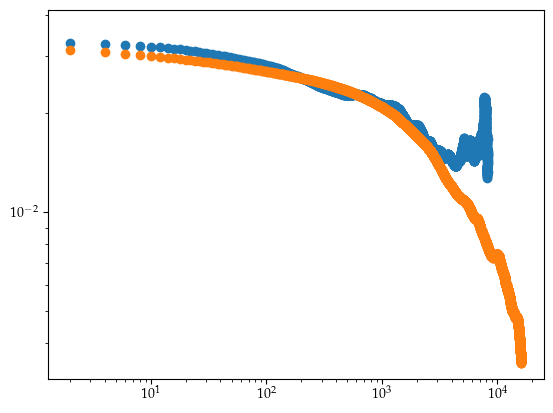

In [49]:
for T in [250, 300]:
    u = mda.Universe(datapath+"T"+str(T)+"K/conf_dry.gro", datapath+"T"+str(T)+"K/prod.xtc")
    all_name = ' '
    for name in np.unique(u.atoms.names):
        if (name[0] == 'H') & (name != 'HW2') & (name != 'HW1'):
            all_name += name + ' '
    hydrogen_protein = u.select_atoms('name '+all_name)

    nmr_result = nmrmd.NMR(u, hydrogen_protein, number_i=20)

    plt.loglog(nmr_result.t[:8000], nmr_result.gij[0][:8000], 'o')